# House Prices - Advanced Regression Techniques

In [1]:
# Executar os imports
import pandas as pd
import numpy as np

### Importando o Dataset

In [9]:
df = pd.read_csv('train.csv')
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [10]:
# Verificar o shape do dataset
df.shape

(1460, 81)

In [11]:
# Verificar as informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Análise Exploratória dos Dados

### Propriedades dos dados

In [12]:
df.describe().round(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,730.50,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,421.61,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,1.00,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,365.75,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,730.50,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,1095.25,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,1460.00,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


In [17]:
# Verificar se existem valores nulos ordenados nas 20 primeiras linhas, em valores percentuais
df.isnull().mean().sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [19]:
# Irei eliminar as colunas com mais de 10% de valores vazios (Null)
(df.isnull().mean()) > 0.1

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [23]:
# Verificar as colunas exatas, e criar um objeto (eliminar)
eliminar = df.columns[(df.isnull().mean()) > 0.1]
eliminar

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [24]:
# Eliminando as colunas
df = df.drop(eliminar, axis=1)


In [25]:
# Verificar novamente
df.isnull().mean().sort_values(ascending=False).head(20)

GarageType      0.055479
GarageCond      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
Electrical      0.000685
WoodDeckSF      0.000000
PavedDrive      0.000000
LowQualFinSF    0.000000
GrLivArea       0.000000
BsmtFullBath    0.000000
BsmtHalfBath    0.000000
FullBath        0.000000
HalfBath        0.000000
dtype: float64

## Selecionar as colunas númericas
- Queremos criar um primeiro modelo para verificar o quanto estamos errando e depois planejas como melhorar.
- Vamos eliminar as colunas de texto
- Precisamos tratar os valores vazios
- Vamos escolher alguns algoritmos para testar e um método de avaliação de erro

In [29]:
# Selecionando apenas colunas numéricas
colunas_numericas = df.columns[df.dtypes != 'object']
colunas_numericas


Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [33]:
# Criar uma nova base com esse valores
df2 = df.loc[:,colunas_numericas]
df2.head(10)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,14115,5,5,1993,1995,0.0,732,0,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,10084,8,5,2004,2005,186.0,1369,0,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,10382,7,6,1973,1973,240.0,859,32,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,6120,7,5,1931,1950,0.0,0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,7420,5,6,1939,1950,0.0,851,0,...,0,4,0,0,0,0,0,1,2008,118000


In [35]:
# Verificando valores vazios
df2.isnull().sum().sort_values(ascending = False).head(3)

GarageYrBlt    81
MasVnrArea      8
Id              0
dtype: int64

In [36]:
# Substituindo os valores vazios por -1, é uma informação que não existia, por isso o -1
df2 = df2.fillna(-1)

In [37]:
# Verificando novamente
df2.isnull().sum().sort_values(ascending = False).head(10)

Id              0
HalfBath        0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
dtype: int64

# Criando nosso modelo

- Vamos separar em treino e teste

In [38]:
# Importando o train test split
from sklearn.model_selection import train_test_split

In [40]:
# Selecionando X e y
X = df2.drop('SalePrice', axis=1)
y = df2.SalePrice

In [41]:
# Separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Regressão Linear

In [42]:
from sklearn.linear_model import LinearRegression

In [46]:
# Criando o regressor e fazendo fit com os dados de treino
modelo_RL = LinearRegression().fit(X_train, y_train)

In [47]:
# Fazendo a previsão pro dados de teste
y_RL = modelo_RL.predict(X_test)

### Importando Arvore de regressão

In [48]:
from sklearn import tree

In [49]:
# Criando o regressor e fazendo o fit com os dados de treino
modelo_AR = tree.DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

In [50]:
# Fazendo a previsão com a arvore
y_AR = modelo_AR.predict(X_test)

### Importando o KNN

In [51]:
from sklearn.neighbors import KNeighborsRegressor

In [53]:
# Criando o modelo KNN
modelo_KNN = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [54]:
# Fazendo a previsão pros dados de teste
y_KNN = modelo_KNN.predict(X_test)

### Importanto o erro médio absoluto e o erro médio quadratico para verificar as métricas dos modelos treinado

In [56]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [60]:
# Avaliando o erro da regressão
print(mean_absolute_error(y_test,y_RL).round(2))
print(mean_squared_error(y_test,y_RL).round(2))

23763.19
1533982883.44


In [61]:
# Erros da arvore de decisão
print(mean_absolute_error(y_test,y_AR).round(2))
print(mean_squared_error(y_test,y_AR).round(2))

27580.79
2530245114.7


In [62]:
# Erros do KNN
print(mean_absolute_error(y_test,y_KNN).round(2))
print(mean_squared_error(y_test,y_KNN).round(2))

33273.08
2733937586.84


- Comparando os modelos, os erros da regressão foram menores

### Criando os gráficos

In [63]:
import matplotlib.pyplot as plt

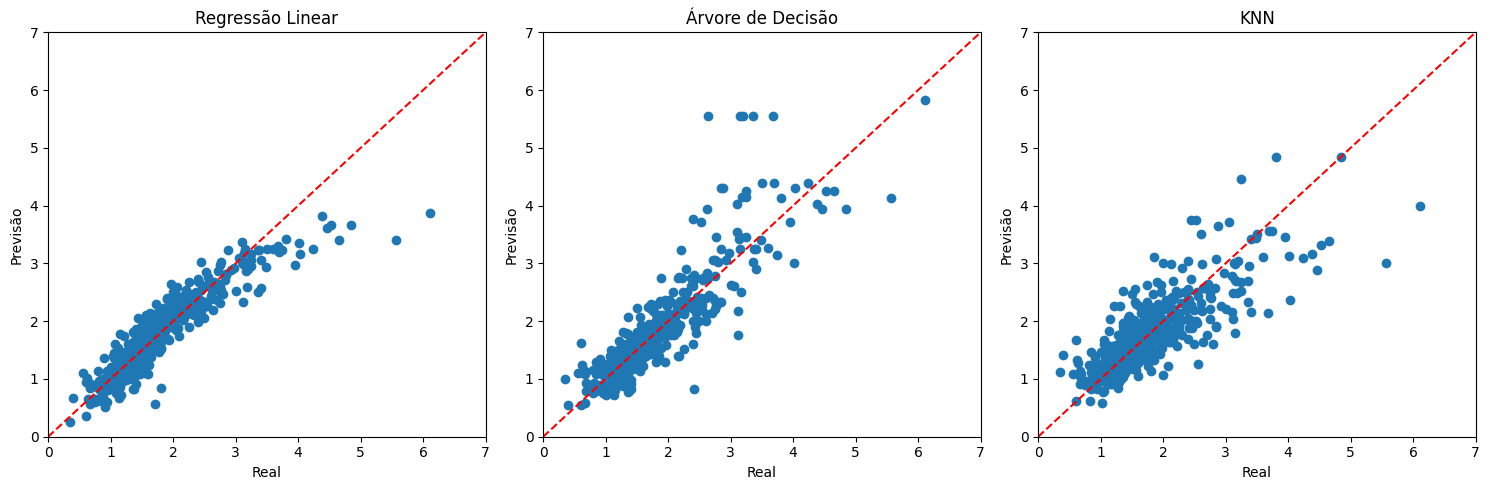

In [67]:

# Criando os gráficos dos modelos
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

# Gráfico 1 - Regressão Linear
ax[0].scatter(y_test / 100000, y_RL / 100000)
ax[0].plot([0, 7], [0, 7], '--r')  # Escala ajustada para os limites (0, 7)
ax[0].set(xlim=(0, 7), ylim=(0, 7))
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Previsão')
ax[0].set_title('Regressão Linear')

# Gráfico 2 - Árvore de Decisão
ax[1].scatter(y_test / 100000, y_AR / 100000)
ax[1].plot([0, 7], [0, 7], '--r')
ax[1].set(xlim=(0, 7), ylim=(0, 7))
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Previsão')
ax[1].set_title('Árvore de Decisão')

# Gráfico 3 - KNN
ax[2].scatter(y_test / 100000, y_KNN / 100000)
ax[2].plot([0, 7], [0, 7], '--r')
ax[2].set(xlim=(0, 7), ylim=(0, 7))
ax[2].set_xlabel('Real')
ax[2].set_ylabel('Previsão')
ax[2].set_title('KNN')

# Ajustar o layout
plt.tight_layout()

# Exibir os gráficos
plt.show()



- ### Vamos utilizar a regressão linear por ter sido o algoritmo com menor erro quadrático médio, a mesma métrica avaliada pelo Kraggle na hora de classificar os modelos

# Fazendo a previsão para a base de teste da competição

In [68]:
# Importando a base de teste
teste = pd.read_csv('test.csv')
teste.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [69]:
# Eliminando as mesmas colunas da base de treino
teste = teste.drop(eliminar,axis=1)

In [72]:
# Verificar as colunas numericas
colunas2 = teste.columns[teste.dtypes != 'object'] 
colunas2

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [73]:
# Mantendo apenas as colunas numericas
teste = teste.loc[:,colunas2]

In [75]:
# Base restante
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1444 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath

In [77]:
# Vizualizando os valores vazios
teste.isnull().mean().sort_values(ascending=False)

GarageYrBlt      0.053461
MasVnrArea       0.010281
BsmtHalfBath     0.001371
BsmtFullBath     0.001371
BsmtUnfSF        0.000685
GarageCars       0.000685
GarageArea       0.000685
BsmtFinSF1       0.000685
BsmtFinSF2       0.000685
TotalBsmtSF      0.000685
OpenPorchSF      0.000000
WoodDeckSF       0.000000
Id               0.000000
EnclosedPorch    0.000000
TotRmsAbvGrd     0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
Fireplaces       0.000000
FullBath         0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
MSSubClass       0.000000
GrLivArea        0.000000
LowQualFinSF     0.000000
2ndFlrSF         0.000000
1stFlrSF         0.000000
YearRemodAdd     0.000000
YearBuilt        0.000000
OverallCond      0.000000
OverallQual      0.000000
LotArea          0.000000
YrSold           0.000000
dtype: float64

- Já que não tem muitos valores vazios, menor que 10%, vamos substituir os mesmos por -1

In [78]:
# Substituindo os valores vazios por -1
teste = teste.fillna(-1)


In [82]:
# Vamos novamente usar a regressao linear para fazer a previsão
y_pred = modelo_RL.predict(teste)
y_pred

array([122234.99595955, 139178.26368424, 169872.05425123, ...,
       175307.58803208, 106132.5314242 , 251494.07738729])

In [83]:
# Podemos adicionar essa coluna de previsão na nossa base
teste['SalePrice'] = y_pred

In [84]:
# Extrair as informações
resultado = teste[['Id', 'SalePrice']]
resultado

,Id,SalePrice
0,1461,122234.995960
1,1462,139178.263684
2,1463,169872.054251
3,1464,199138.801656
4,1465,196257.109229
...,...,...
1454,2915,59584.320646
1455,2916,54459.048029
1456,2917,175307.588032
1457,2918,106132.531424


In [85]:
# Podemos então exportar essa base para csv, sem o index
resultado.to_csv('resultado.csv', index=False)